In [132]:
import geopandas as gpd
import numpy as np
import shapely
import matplotlib.pyplot as plt

In [133]:
rivers = gpd.read_file("na_sword_reaches_v16.gpkg").set_index('reach_id')
east_coast = gpd.read_file("east_coast.geojson")
coast = gpd.read_file("tl_2019_us_coastline.zip")

In [134]:
# use only coastal and wide
r = rivers_east.loc[rivers_east['n_rch_dn'] == 0].loc[rivers_east['width'] > 100]

<Axes: >

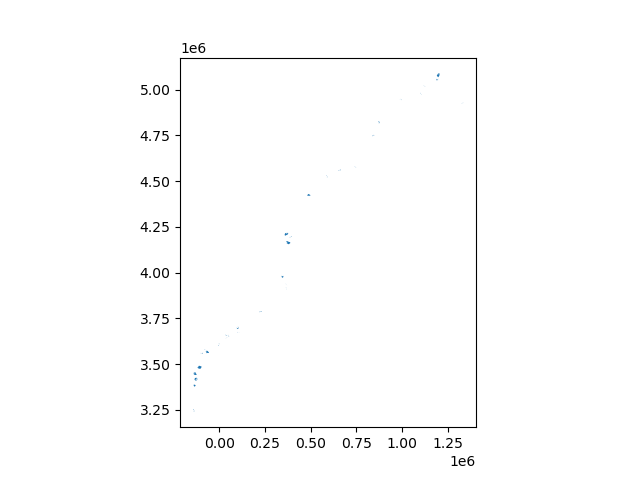

In [135]:
r.plot()

In [136]:
# put point 20 km upriver

# # use next reach up if it's not long enough
ids = np.array(r.index)

# geometry for down (use for coastal)


# #while r.loc[ids, 'dist_out'].min() / 1000  < 10: 
for i in ids: 
    if r.to_crs('EPSG:32618').length[i] / 1000  < 5: 
        nextup = r.loc[i, 'rch_id_up']
        if len(nextup) == 11: 
            # add new id to list
            if int(nextup) in np.array(r.index): 
                ids = np.append(ids, nextup)
                #r.loc[i, 'geometry'] = rivers.loc[[i, int(nextup)]]
        else: 
        # remove old id
            ids = np.delete(ids, np.where(ids == i))
        # ids.remove(i)

In [137]:
# only include those at least 5km long
new_r = r.loc[ids].loc[r.loc[ids].to_crs('EPSG:32618').length / 1000 > 5]

In [138]:
new_r = r.loc[ids]

<Axes: >

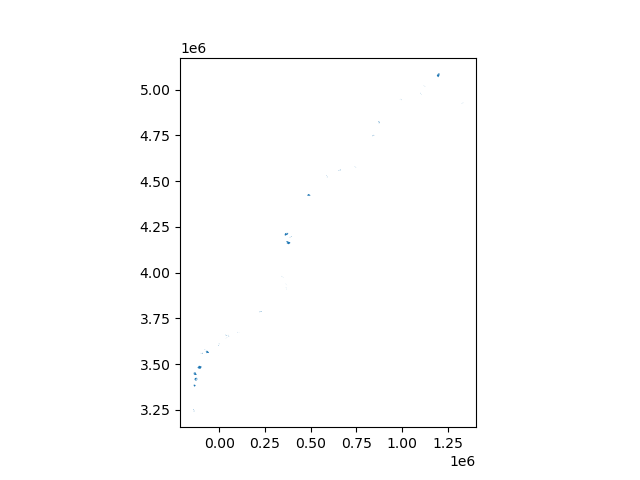

In [139]:
new_r.plot()

In [130]:
points_1 = shapely.get_point(new_r.geometry, -1)
points_1 = points_1.set_crs(new_r.crs)
points_1.to_crs("EPSG:4326").to_file("river_points.geojson")

In [131]:
rivers_east.to_file("rivers_east.geojson")

In [140]:
# edit manually in GIS to make them look good
# then manually add coastal points and load them here for matchup
coastal = gpd.read_file("coastal_points.zip")

In [146]:
points_1 = points_1.set_crs(new_r.crs)

In [151]:
rivers = gpd.read_file('river_points.geojson')

<Axes: >

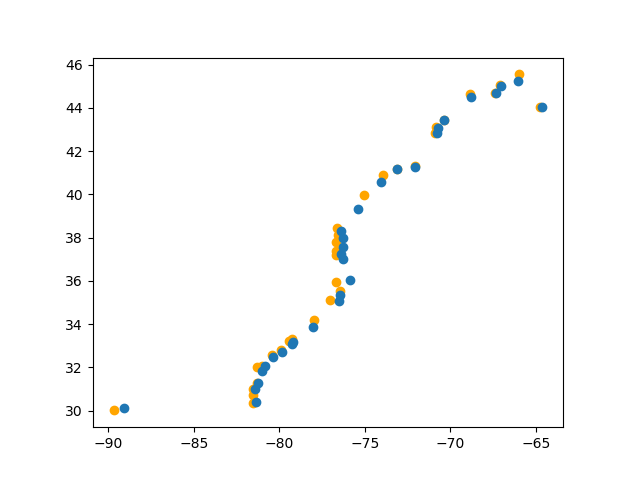

In [153]:
fig, ax = plt.subplots()
rivers.to_crs(coastal.crs).plot(ax=ax, color = "orange")
coastal.plot(ax = ax)

In [158]:
# match up closest
rivers['id'] = rivers.index

In [170]:
rivers['lat'] = rivers.geometry.y

In [174]:
coastal.loc[0:0]

,id,geometry
0,0,POINT (-80.35407 32.48158)


In [179]:
order = []
for i in range(coastal.shape[0]): 
    d= rivers.distance(coastal.loc[i:i].union_all())
    order.append(np.where(d == min(d)))
    

/tmp/ipykernel_5108/469525028.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  d= rivers.distance(coastal.loc[i:i].union_all())
